# Conclusão
Neste projeto, foi realizado todo o trabalho de tratamento de dados para que a  análise exploratória fosse a mais precisa possível, efetuando as substituições e exclusões necessárias. Após o tratamento, foi possível identificar comportamentos estratégicos para fundamentar a tomada de decisão da nossa campanha.

Dessa forma, as recomendações são:

1. **Foco em Plataformas**: Priorizar as plataformas PS4 e Xbox One para os mercados da América do Norte (NA) e Europa (EU). Já para o mercado do Japão (JP), o foco deve ser em plataformas portáteis e no PS4.

2. **Confiança nas Avaliações**: Considerar principalmente as avaliações dos críticos, uma vez que demonstraram maior impacto ou consistência em relação às vendas.

3. **Preferência por Gêneros**: Jogos de Tiro (Shooter) e Esportes possuem maior relevância nas regiões EU e NA; portanto, o foco deve ser neles. Para o Japão, a estratégia deve focar em Luta, Role-Playing (RPG) e Simuladores.

4. **Classificação ESRB (Rating)**: Nas regiões EU e NA, deve-se levar em consideração os ratings M (Mature) e E (Everyone). No Japão, o foco deve ser em títulos E, T (Teen) ou jogos sem classificação definida, que possuem forte presença naquele mercado.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('games.csv')
SEED = 26


df.sample(5, random_state=SEED)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
new_title = []
for title in df.columns:
    new_columns = title.strip().lower().replace(' ', '_')
    new_title.append(new_columns)
    

df.columns = new_title



In [4]:
list_na_year = df[df['year_of_release'].isna()]['name'].unique() #cria lista de games sem ano

df_valid = df[df['name'].isin(list_na_year)].dropna(subset=['year_of_release']) #valida se o nome do game é encontrado na lista
df_valid = df_valid.set_index('name')['year_of_release'].to_dict() #dicionario do nome do jogo e do ano

df['year_of_release'] = df['year_of_release'].fillna(df['name'].map(df_valid)) #substitui os NAs com informações encontradas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.dropna(subset=['year_of_release'], inplace=True) #removendo valores nulos da coluna
df.dropna(subset=['name'], inplace=True) #removendo valores nulos da coluna
df['rating'] = df['rating'].fillna('Unknown') #substitui nulos por Unknown
df['year_of_release'] = df['year_of_release'].astype(int) #substituindo por valores int
df['user_score'] = df['user_score'].replace('tbd', np.nan) # substiuindo tbd por valores nan
df['user_score'] = df['user_score'].astype(float) #substituindo por valores float
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
conditions = [
    (df['critic_score'].notna()) & (df['user_score'].notna()), #AVALIAÇÃO  COMPLETA
    (df['critic_score'].isna()) & (df['user_score'].isna()), # SEM AVALIAÇÃO
    (df['critic_score'].notna()) & (df['user_score'].isna()), # APENAS CRITIC
    (df['critic_score'].isna()) & (df['user_score'].notna()) # APENAS USER
]

category_score = [
    'Full review',
    'No review',
    'Only critic',
    'Only user'    
]

df['category_score'] = np.select(conditions, category_score, default='Unknown')

In [9]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] #criando nova coluna com soma de vendas
df.sample(10, random_state = SEED)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,category_score
7550,Le Mans 24 Hours,PS2,2001,Racing,0.09,0.07,0.02,0.02,75.0,7.6,E,0.20,Full review
15405,Nisenochigiri,PSP,2010,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,Unknown,0.02,No review
15180,Tropico 4: Modern Times,PC,2012,Strategy,0.00,0.02,0.00,0.00,78.0,8.0,T,0.02,Full review
8818,FIFA Soccer 2002,PS,2001,Sports,0.08,0.06,0.00,0.01,81.0,6.4,E,0.15,Full review
14273,James Pond: Codename Robocod,GBA,2005,Platform,0.02,0.01,0.00,0.00,NaN,NaN,Unknown,0.03,No review
14169,The Night of the Rabbit,PC,2013,Adventure,0.00,0.03,0.00,0.00,75.0,7.5,Unknown,0.03,Full review
9395,Ken to Mahou to Gakuen Mono. 3,PSP,2010,Role-Playing,0.00,0.00,0.13,0.00,NaN,NaN,Unknown,0.13,No review
3331,Fight Night Round 2,XB,2005,Fighting,0.42,0.16,0.00,0.02,88.0,8.8,T,0.60,Full review
4276,2 Games in 1: SpongeBob SquarePants: SuperSpon...,GBA,2005,Platform,0.33,0.12,0.00,0.01,NaN,NaN,Unknown,0.46,No review
13123,Bakusou Kyoudai Let's & Go!! Eternal Wings,PS,1998,Racing,0.00,0.00,0.05,0.00,NaN,NaN,Unknown,0.05,No review


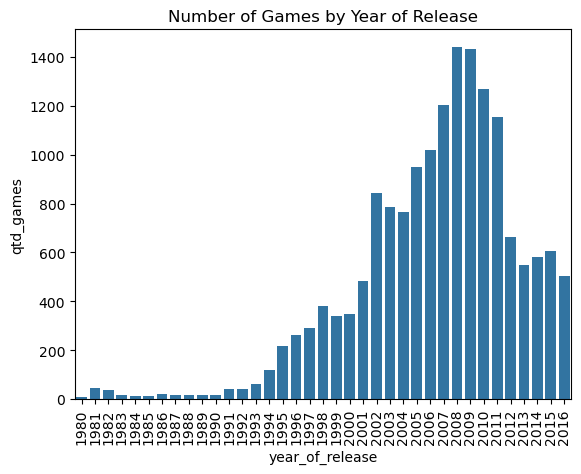

In [11]:

df_qtd_for_year = df.groupby('year_of_release').size().reset_index(name = 'qtd_games') #agrupando para montar o grafico de barras 




sns.barplot(data=df_qtd_for_year,
            x='year_of_release',
            y='qtd_games',
)

plt.xticks(rotation=90)
plt.title('Number of Games by Year of Release')
plt.show()

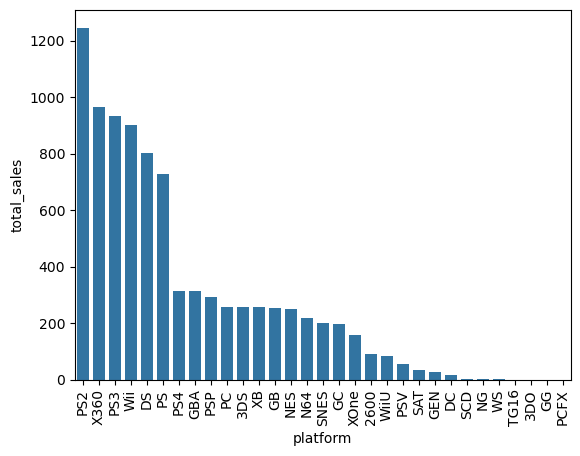

In [13]:
df_plataform_sales = df.groupby('platform')['total_sales'].sum().reset_index(name = 'total_sales') #agrupando porplataforma e somando as vendas
df_plataform_sales = df_plataform_sales.sort_values('total_sales', ascending = False) #ordenando a coluna ordem decrescente 
 
sns.barplot(data=df_plataform_sales, x='platform', y='total_sales')
plt.xticks(rotation=90)
plt.show()


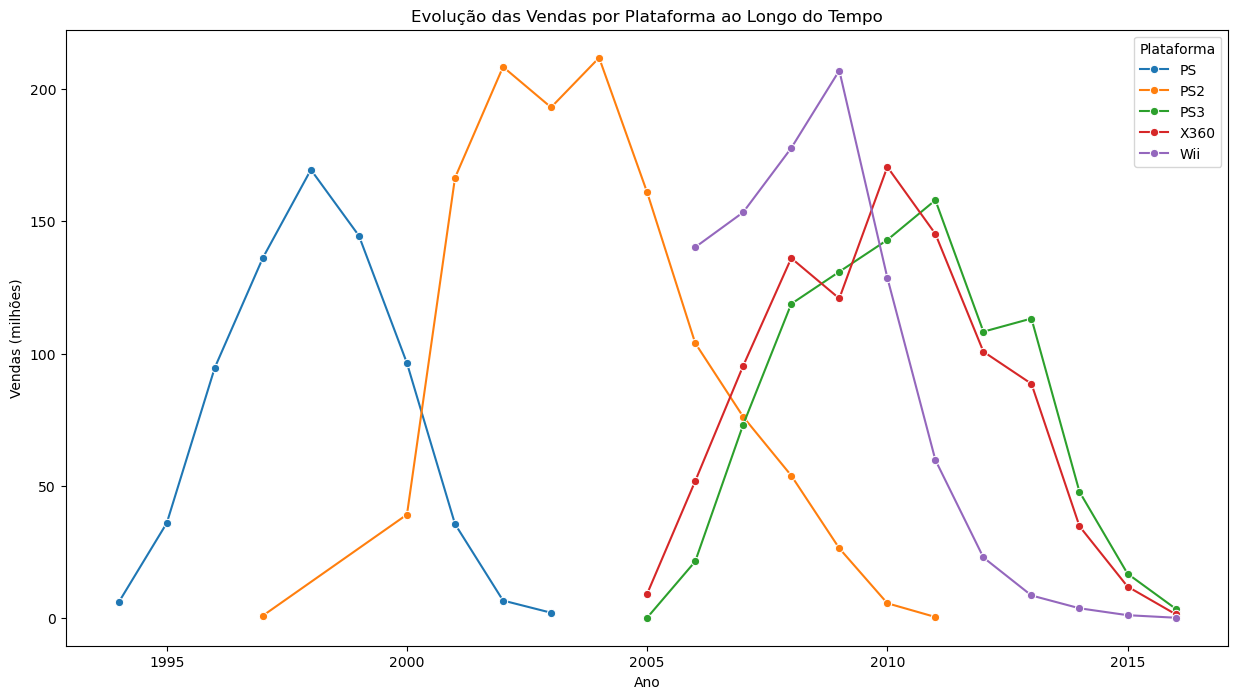

In [14]:

top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'PS'] #lista das 5 plataformas com maior valor vendido

df_filtred = df[df['platform'].isin(top_platforms)] #DF filtrado



df_sales_year = df_filtred.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index() 



plt.figure(figsize=(15, 8))

sns.lineplot(
    data=df_sales_year,
    x='year_of_release', 
    y='total_sales', 
    hue='platform',      
    marker='o',         
   
)


plt.title('Evolução das Vendas por Plataforma ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Vendas (milhões)')
plt.legend(title='Plataforma') 
plt.show(
)



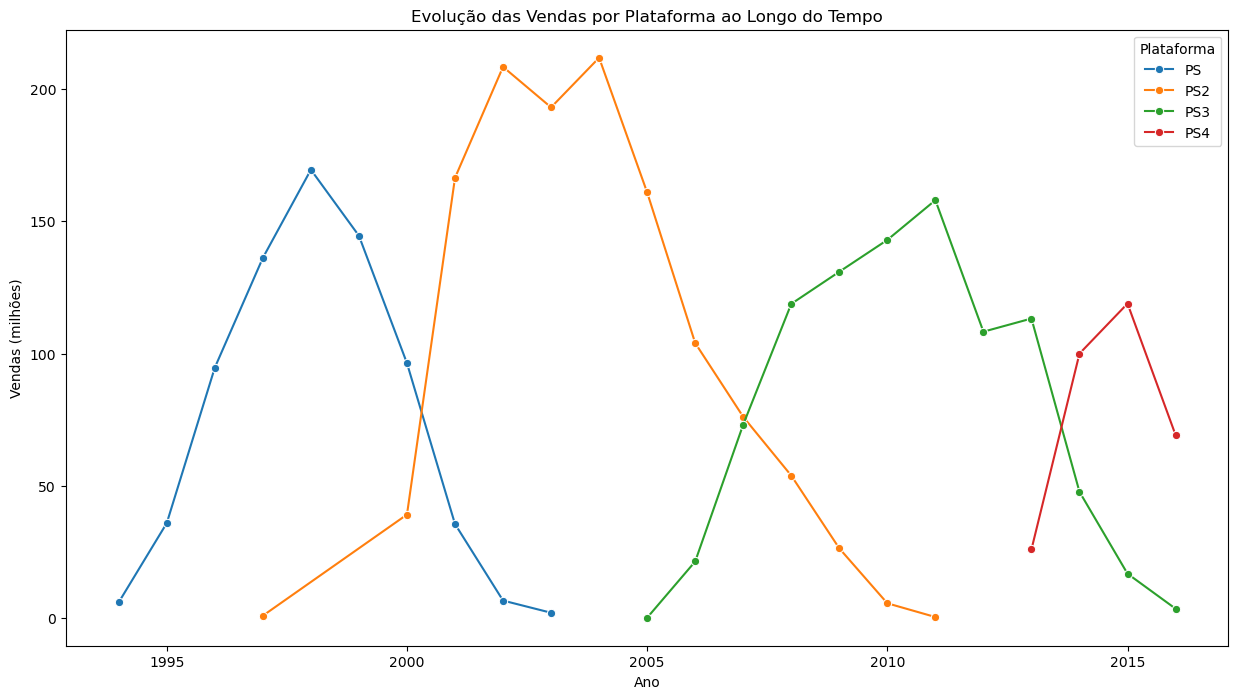

In [16]:
new_vs_old = ['PS', 'PS2', 'PS3', 'PS4'] #lista da familia da linha Playstation
df_filtred = df[df['platform'].isin(new_vs_old)] #DF filtrado



df_sales_year = df_filtred.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index() #agrupando os dados


plt.figure(figsize=(15, 8))

sns.lineplot(
    data=df_sales_year,
    x='year_of_release', 
    y='total_sales', 
    hue='platform',      
    marker='o',         
   
)


plt.title('Evolução das Vendas por Plataforma ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Vendas (milhões)')
plt.legend(title='Plataforma') 
plt.show()



In [18]:
df_platform_duration = df.groupby('platform')['year_of_release'].agg(['min', 'max', 'count']).reset_index() #agrupa por plataforma e cria colunas menor e maior ano, e quantidade de jogos
df_platform_duration['duracao'] = df_platform_duration['max'] - df_platform_duration['min'] # nova coluna para mostrar tempo de vida da plataforma
df_platform_duration.columns = ['platform','primeiro_ano', 'ultimo_ano', 'total_jogos', 'duracao_anos'] #novos titulos as colunas

df_duration_filtred = df_platform_duration[df_platform_duration['platform'].isin(top_platforms)] #filtrando os dados
mean_duration = df_duration_filtred['duracao_anos'].mean()

df_filtred_diff= df_platform_duration[df_platform_duration['platform'].isin(new_vs_old)]
print('A duração média para plataformas aparecerem é de', df_filtred_diff['primeiro_ano'].diff().mean())

print(f'A duração média para as plataformas desaparecerem é de {mean_duration} anos')






A duração média para plataformas aparecerem é de 6.333333333333333
A duração média para as plataformas desaparecerem é de 11.0 anos


In [19]:

df = df[df['year_of_release'] >= 2012] #considerando que vamos fazer uma campanha para 2017 escolhi trabalhar os ultimo 4 anos

df_top_sales = df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales', ascending = False)


print('As plataformas com maior valor em vendas são') 
print(df_top_sales.head(3))

print('As plataformas que menor valor em venda')
print(df_top_sales.tail(3))




As plataformas com maior valor em vendas são
  platform  total_sales
4      PS4       314.14
3      PS3       289.71
9     X360       237.52
As plataformas que menor valor em venda
  platform  total_sales
7      Wii        36.60
1       DS        13.21
5      PSP        11.69


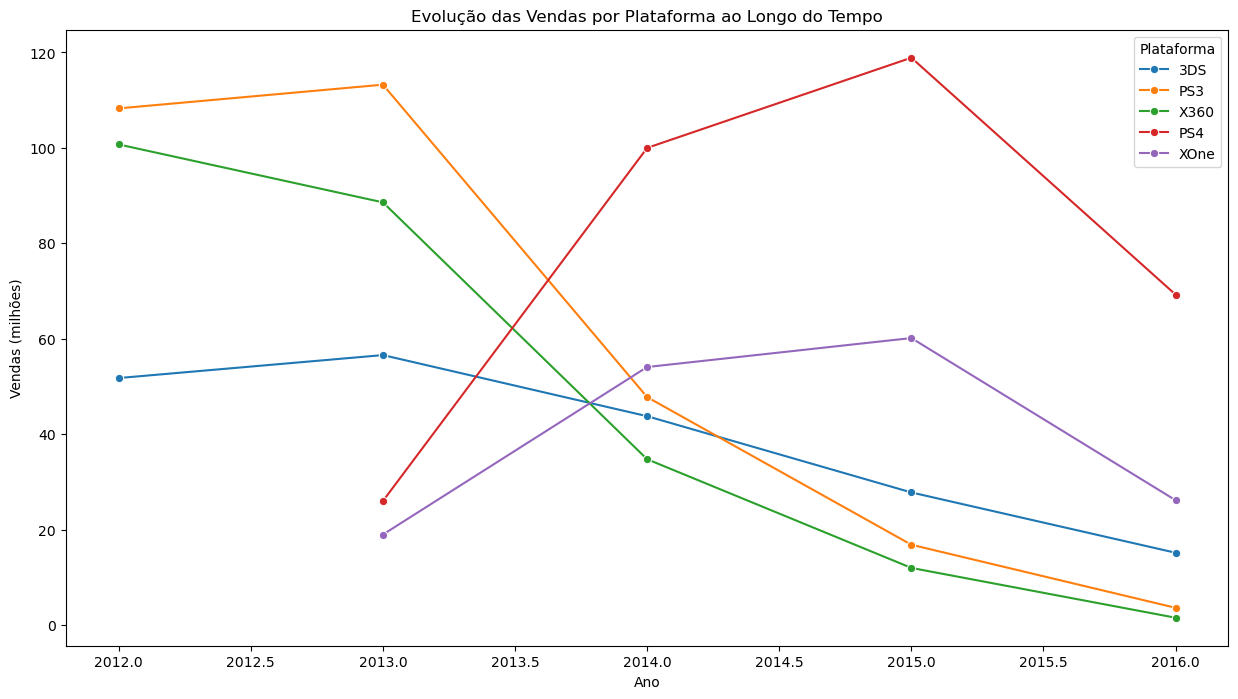

In [20]:


df_graf = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()


list_graf_top_sales = ['PS4', 'XOne', 'PS3', 'X360', '3DS']
list_graf_off_sales = ['PC', 'DS', 'PSP', 'Wii','WiiU', 'PSV' ]


graf_top = df_graf[df_graf['platform'].isin(list_graf_top_sales)] #filtrando de acordo com as listas de plataformas criadas anteriormente
graf_off = df_graf[df_graf['platform'].isin(list_graf_off_sales)]



plt.figure(figsize=(15, 8))
sns.lineplot(
    data= graf_top,
    x='year_of_release', 
    y='total_sales', 
    hue='platform',      
    marker='o',         
   
)


plt.title('Evolução das Vendas por Plataforma ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Vendas (milhões)')
plt.legend(title='Plataforma') 
plt.show()



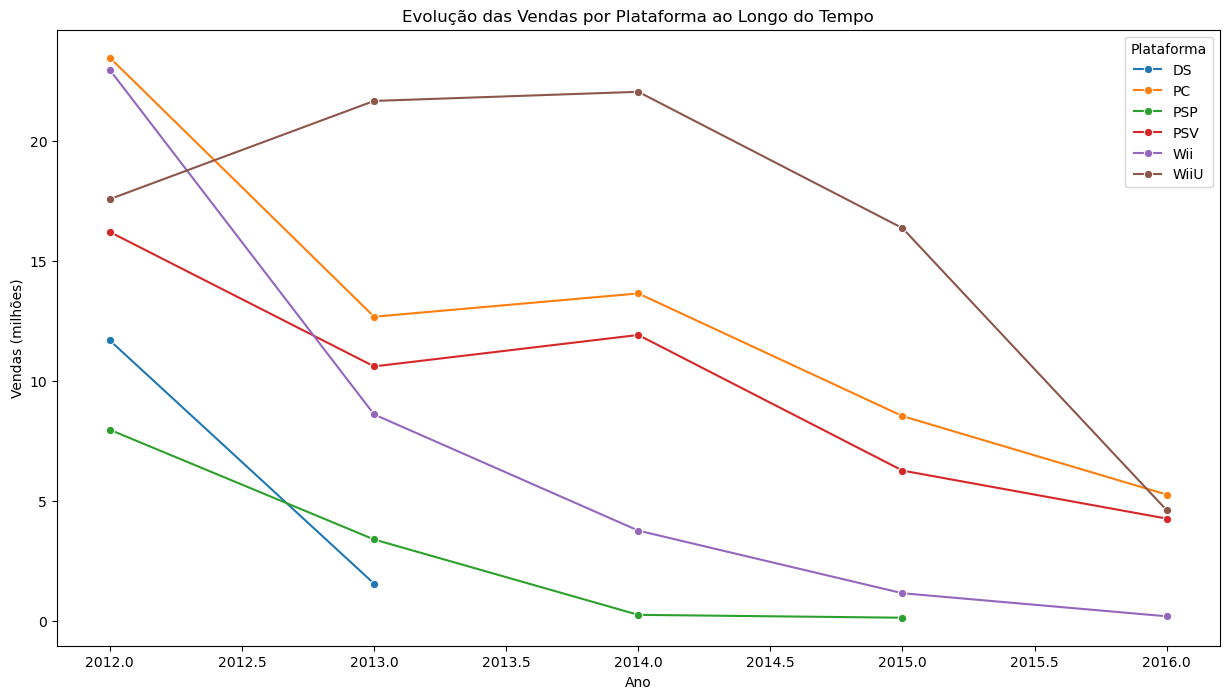

In [22]:
plt.figure(figsize=(15, 8))
sns.lineplot(
    data= graf_off,
    x='year_of_release', 
    y='total_sales', 
    hue='platform',      
    marker='o',         
)


plt.title('Evolução das Vendas por Plataforma ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Vendas (milhões)')
plt.legend(title='Plataforma') 
plt.show()



C:\Users\Rafae\AppData\Local\Temp\ipykernel_21100\2701176496.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Platform')


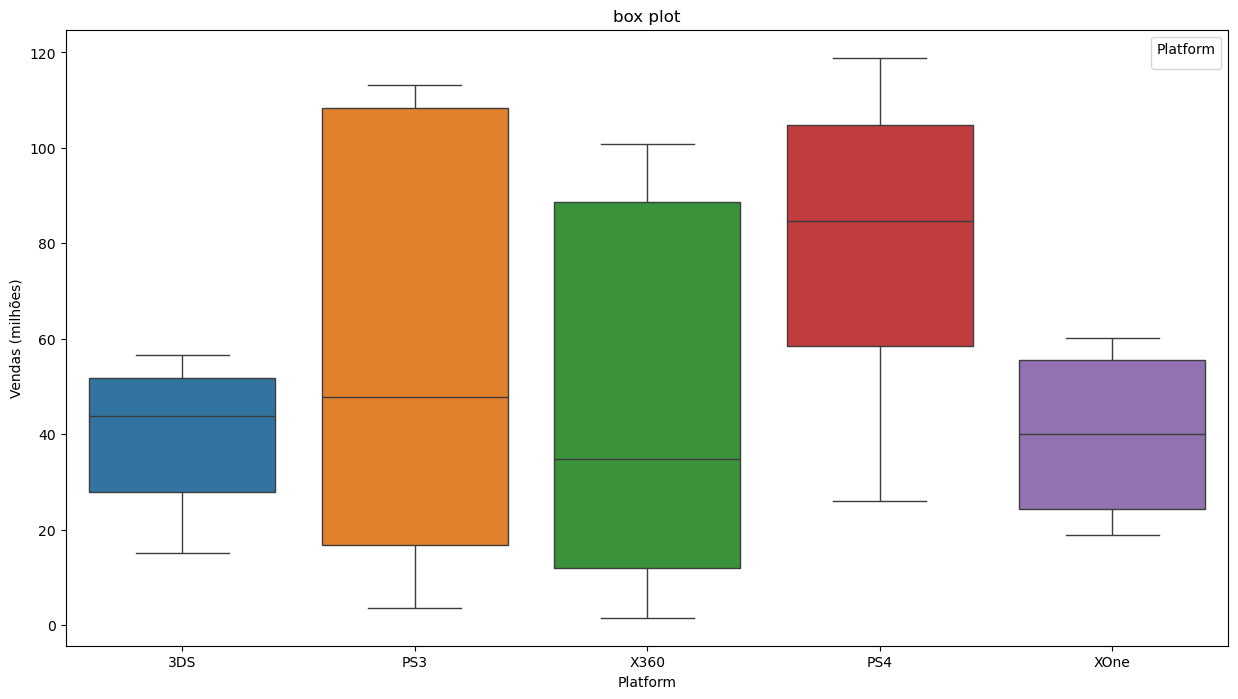

In [23]:
plt.figure(figsize=(15, 8))


gx = sns.boxplot (data = graf_top,
                  y = 'total_sales',
                  x = 'platform',
                  hue = 'platform'
                 
)

plt.title('box plot')
plt.xlabel('Platform')
plt.ylabel('Vendas (milhões)')
plt.legend(title='Platform') 
plt.show()




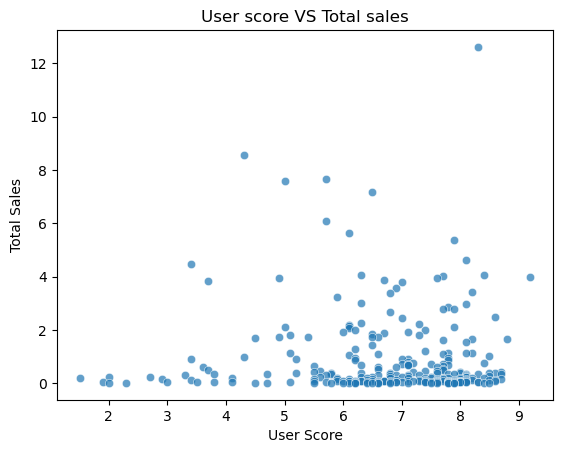

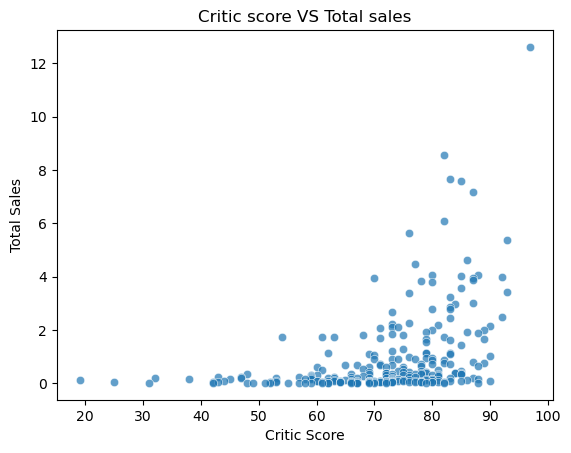

In [25]:

df_PS4 = df[df['platform'] == 'PS4']


sct_user = sns.scatterplot(data = df_PS4,
                x = 'user_score',
                y = 'total_sales',
                alpha = 0.7)

plt.title('User score VS Total sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.show()


sct_critic = sns.scatterplot(data = df_PS4,
                x = 'critic_score',
                y = 'total_sales',
                alpha = 0.7)

plt.title('Critic score VS Total sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()



In [27]:

df_PS4_clean = df_PS4.dropna(subset=['user_score', 'critic_score', 'total_sales']) #limapndo dados


corr_user = df_PS4_clean['user_score'].corr(df_PS4_clean['total_sales']) #calculando correlação
print(f"Correlação User Score vs Vendas: {corr_user:.3f}")


corr_critic = df_PS4_clean['critic_score'].corr(df_PS4_clean['total_sales'])
print(f"Correlação Critic Score vs Vendas: {corr_critic}")

Correlação User Score vs Vendas: -0.034
Correlação Critic Score vs Vendas: 0.40589480145836687


In [29]:


comp_plat = ['PS4', 'XOne']


df_comp = df[df['platform'].isin(comp_plat)]

jogos_por_plataforma = df_comp.groupby('name')['platform'].nunique()

jogos_em_ambas = jogos_por_plataforma[jogos_por_plataforma == 2].index #filtrando apenas jogos que aparecem nas duas plataformas

df_jogos_ambas_plataformas = df_comp[df_comp['name'].isin(jogos_em_ambas)]

print(f"Jogos que aparecem em ambas as plataformas: {len(jogos_em_ambas)}")
print(f"Total de registros no novo DataFrame: {len(df_jogos_ambas_plataformas)}")



Jogos que aparecem em ambas as plataformas: 217
Total de registros no novo DataFrame: 434


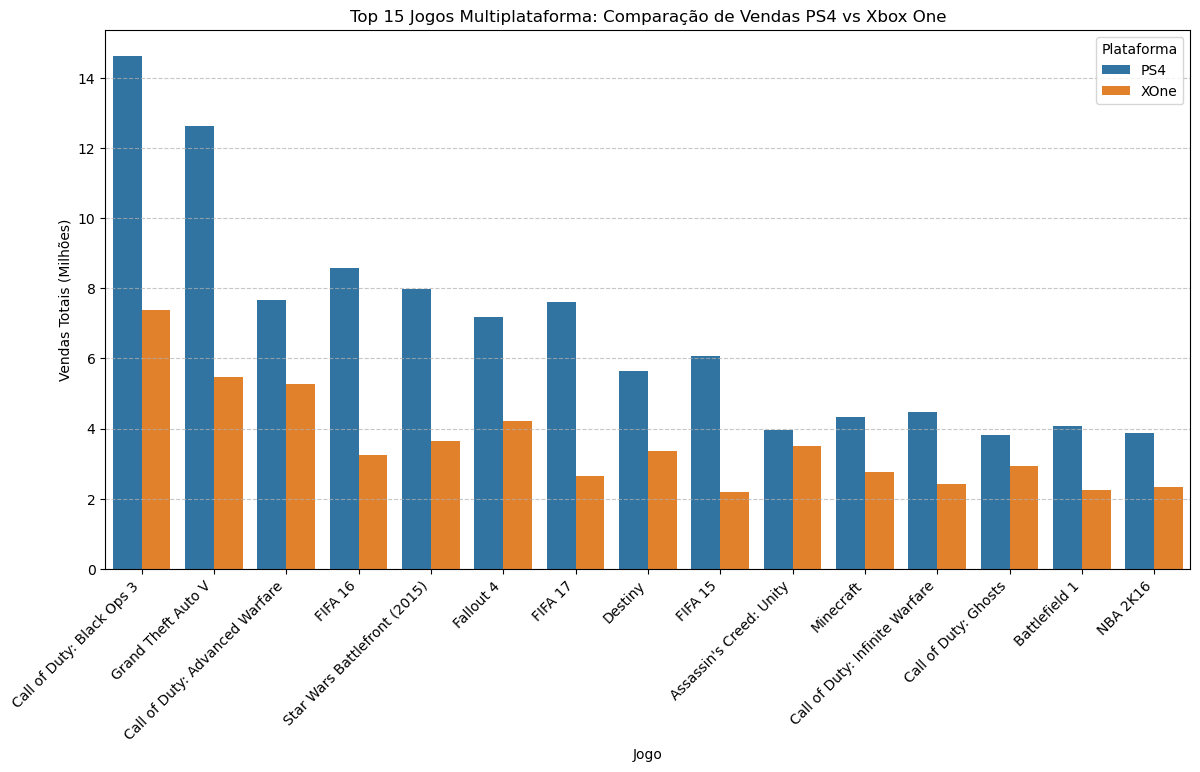

In [ ]:


jogos_em_ambas = df_jogos_ambas_plataformas.groupby('name')['platform'].nunique()
jogos_em_ambas = jogos_em_ambas[jogos_em_ambas == 2].index

#Filtrar o DataFrame original apenas para esses jogos repetidos
df_filtrado = df_jogos_ambas_plataformas[df_jogos_ambas_plataformas['name'].isin(jogos_em_ambas)]

# 3. jogos que estão em ambas as plataformas
top_vendas_nomes = (df_filtrado
                    .groupby('name')['total_sales']
                    .sum()
                    .sort_values(ascending=False)
                    .head(15) # Top 15 jogos que estão em ambos
                    .index)


df_plot = df_filtrado[df_filtrado['name'].isin(top_vendas_nomes)]

plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_plot, 
    x='name', 
    y='total_sales', 
    hue='platform',
    order=top_vendas_nomes # Mantém a ordem do maior sucesso para o menor
)

plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Jogos Multiplataforma: Comparação de Vendas PS4 vs Xbox One')
plt.xlabel('Jogo')
plt.ylabel('Vendas Totais (Milhões)')
plt.legend(title='Plataforma')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



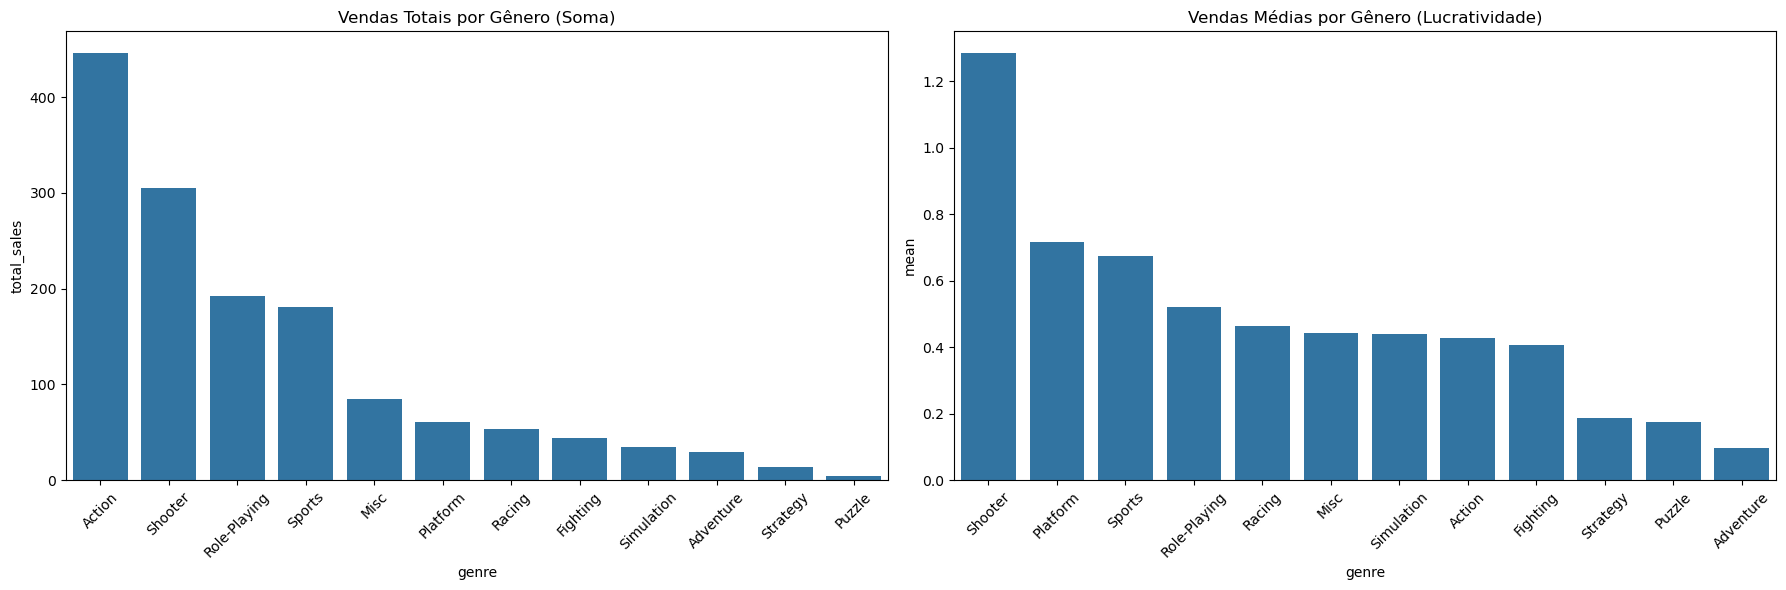

In [33]:


df_genre = df.groupby('genre')['total_sales'].agg(['size', 'sum', 'mean']).reset_index().sort_values('sum', ascending = False)
df_genre.columns = ['genre', 'count', 'total_sales', 'mean']


fig, axes = plt.subplots(1, 2, figsize=(18, 6))


sns.barplot(data=df_genre, x='genre', y='total_sales', ax=axes[0])
axes[0].set_title('Vendas Totais por Gênero (Soma)')
axes[0].tick_params(axis='x', rotation=45)


sns.barplot(data=df_genre.sort_values('mean', ascending=False), x='genre', y='mean', ax=axes[1])
axes[1].set_title('Vendas Médias por Gênero (Lucratividade)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


As 5 plataformas principais na regiao NA são ['X360', 'PS4', 'PS3', 'XOne', '3DS']


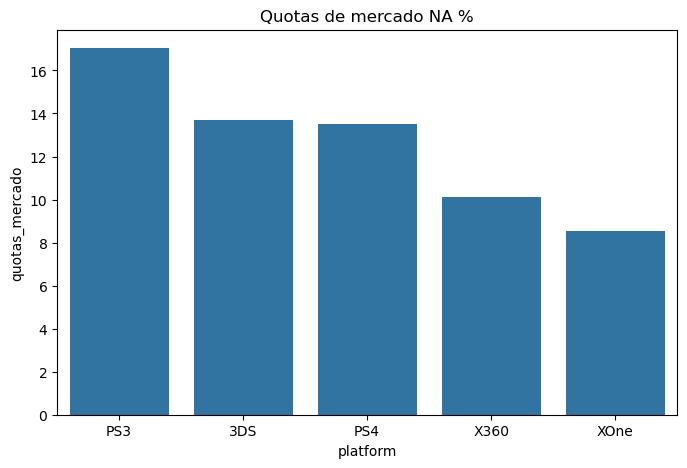

Os 5 generos principais na regiao NA são ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


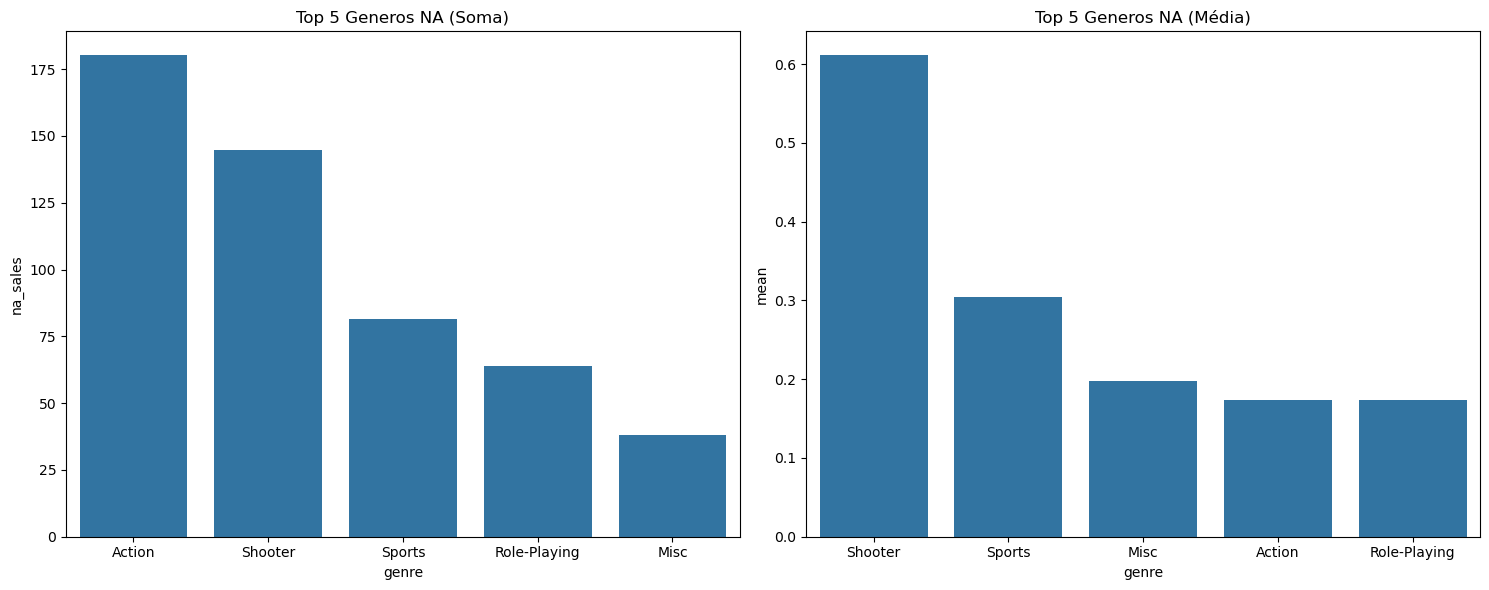

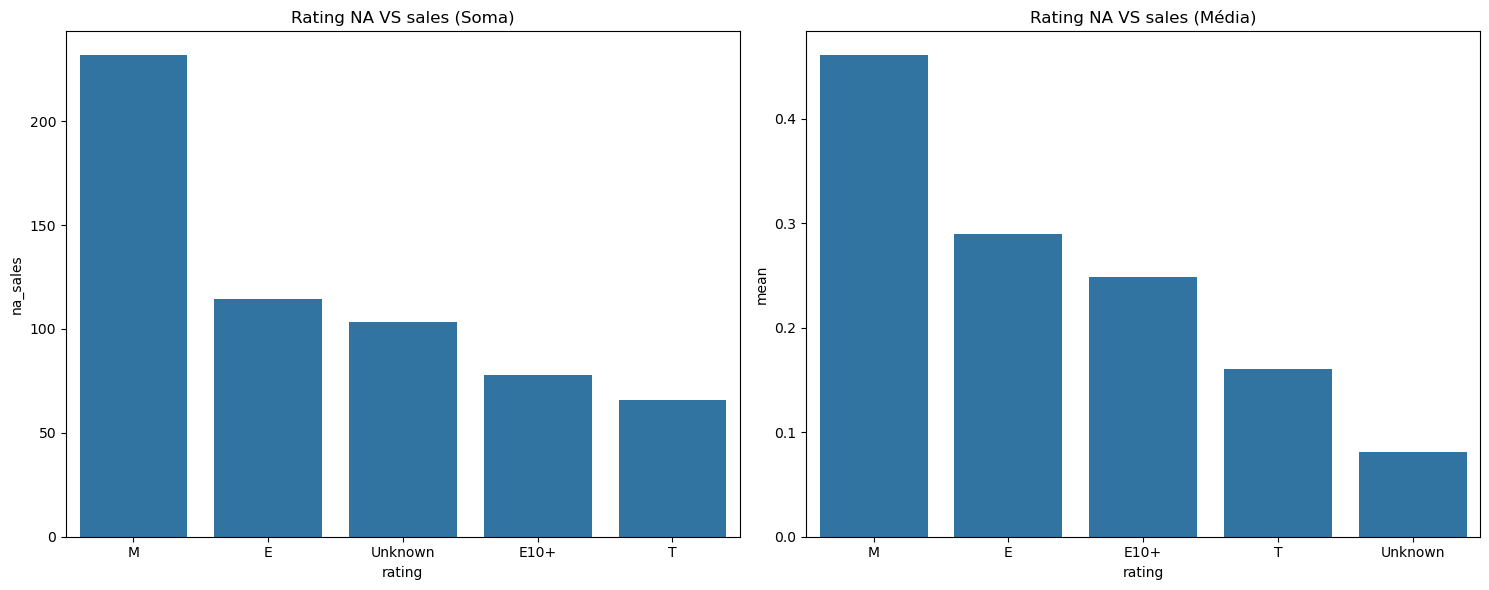

In [35]:



df_na_platform = df.groupby('platform')['na_sales'].agg(na_sales = 'sum', count = 'size').reset_index().sort_values('na_sales', ascending = False)
df_na_platform['quotas_mercado'] = (df_na_platform['count'] / df_na_platform['count'].sum()) * 100  #após realizar o agrupamento fiz o calculo de quanto aquelas vendas representao em %

top_platform_na = df_na_platform['platform'].head(5).tolist() #criando lista
print(f'As 5 plataformas principais na regiao NA são {top_platform_na}')

filtred_df_na = df_na_platform[df_na_platform['platform'].isin(top_platform_na)].sort_values('quotas_mercado', ascending = False) #filtrado e ordenando dados

plt.figure(figsize=(8, 5))
sns.barplot(data = filtred_df_na, x = 'platform', y = 'quotas_mercado')
plt.title('Quotas de mercado NA %')
plt.show()

df_na_genre = df.groupby('genre')['na_sales'].agg(na_sales = 'sum', count = 'size', mean = 'mean').reset_index().sort_values('na_sales', ascending = False)
top_genre_na = df_na_genre['genre'].head(5).tolist()
print(f'Os 5 generos principais na regiao NA são {top_genre_na}')
df_genre_filtred_na = df_na_genre[df_na_genre['genre'].isin(top_genre_na)]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=df_genre_filtred_na, x='genre', y='na_sales', ax=axes[0])
axes[0].set_title('Top 5 Generos NA (Soma)')
sns.barplot(data=df_genre_filtred_na.sort_values('mean', ascending=False), x='genre', y='mean', ax=axes[1])
axes[1].set_title('Top 5 Generos NA (Média)')
plt.tight_layout()
plt.show()

df_na_rating = df.groupby('rating')['na_sales'].agg(na_sales = 'sum', count = 'size', mean = 'mean').reset_index().sort_values('na_sales', ascending = False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=df_na_rating, x='rating', y='na_sales', ax=axes[0])
axes[0].set_title('Rating NA VS sales (Soma)')
sns.barplot(data=df_na_rating.sort_values('mean', ascending=False), x='rating', y='mean', ax=axes[1])
axes[1].set_title('Rating NA VS sales (Média)')
plt.tight_layout()
plt.show()






As 5 plataformas principais na regiao NA são ['X360', 'PS4', 'PS3', 'XOne', '3DS']


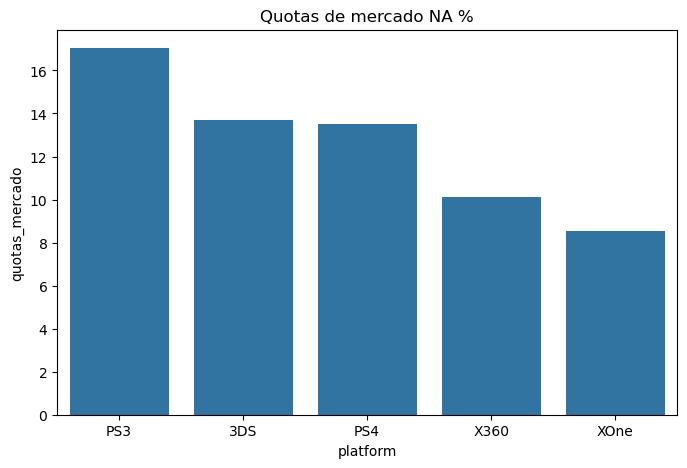

Os 5 generos principais na regiao NA são ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


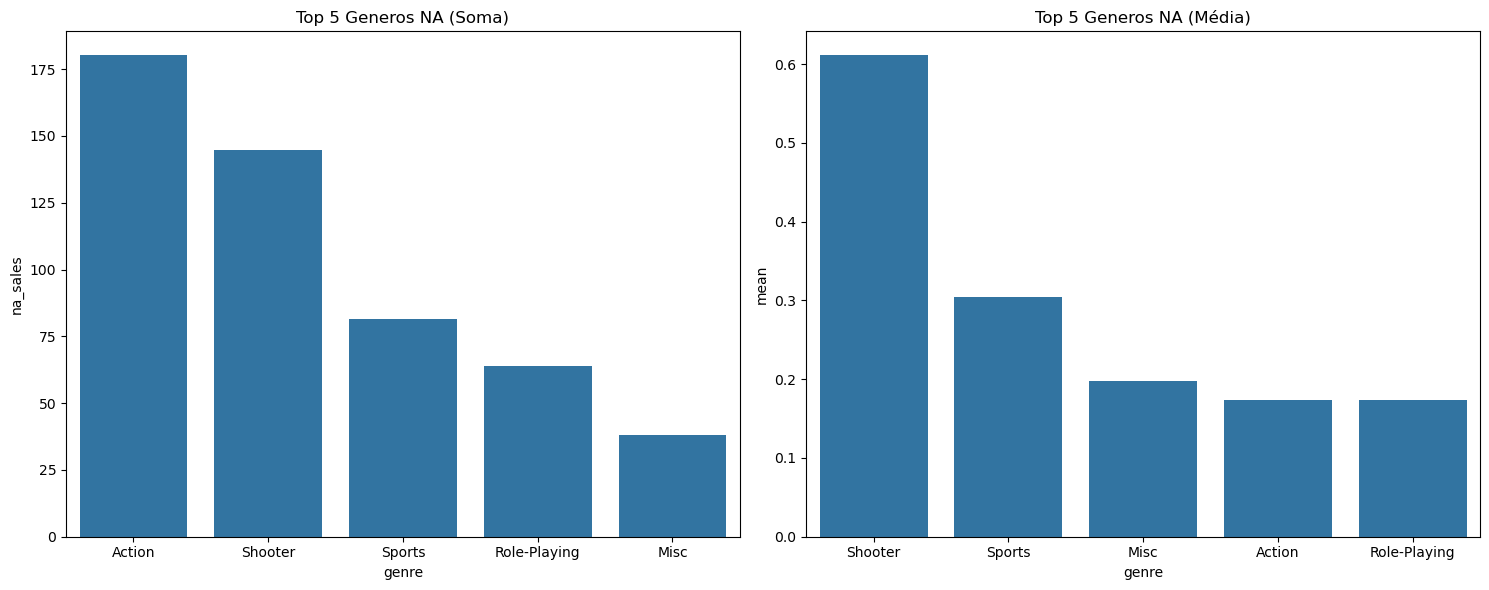

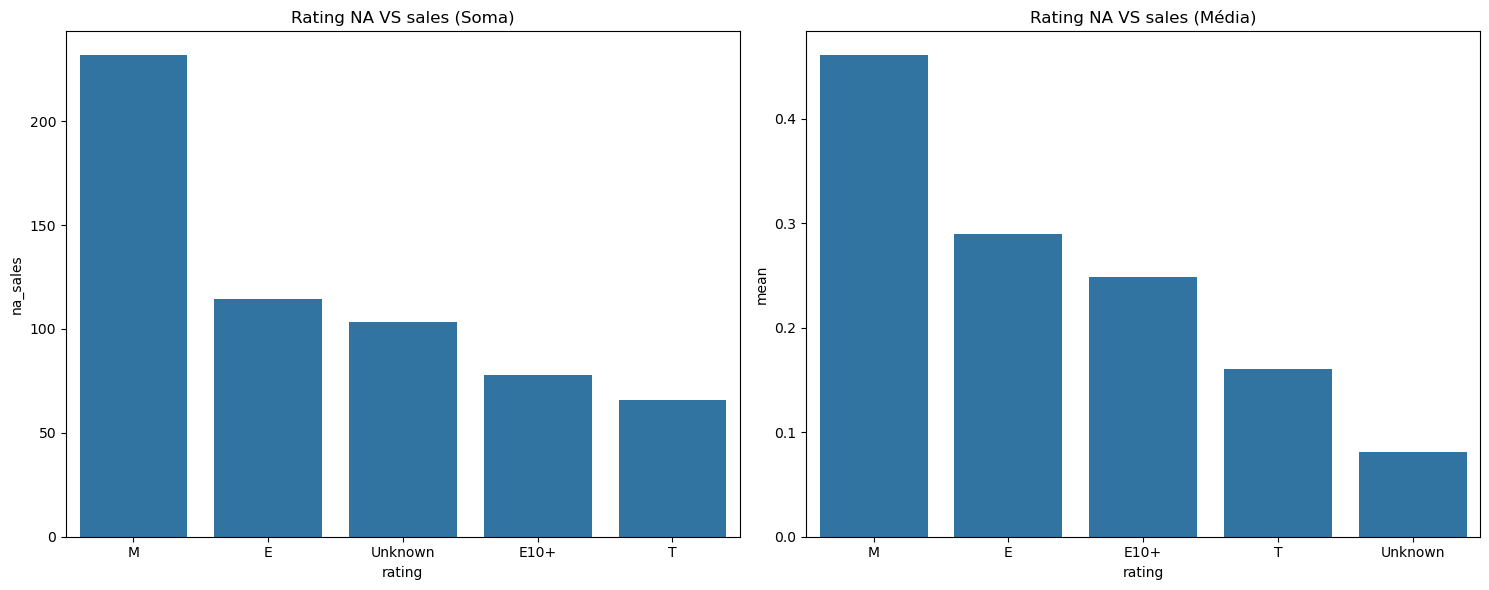

In [37]:



df_na_platform = df.groupby('platform')['na_sales'].agg(na_sales = 'sum', count = 'size').reset_index().sort_values('na_sales', ascending = False)
df_na_platform['quotas_mercado'] = (df_na_platform['count'] / df_na_platform['count'].sum()) * 100  #após realizar o agrupamento fiz o calculo de quanto aquelas vendas representao em %

top_platform_na = df_na_platform['platform'].head(5).tolist() #criando lista
print(f'As 5 plataformas principais na regiao NA são {top_platform_na}')

filtred_df_na = df_na_platform[df_na_platform['platform'].isin(top_platform_na)].sort_values('quotas_mercado', ascending = False) #filtrado e ordenando dados

plt.figure(figsize=(8, 5))
sns.barplot(data = filtred_df_na, x = 'platform', y = 'quotas_mercado')
plt.title('Quotas de mercado NA %')
plt.show()

df_na_genre = df.groupby('genre')['na_sales'].agg(na_sales = 'sum', count = 'size', mean = 'mean').reset_index().sort_values('na_sales', ascending = False)
top_genre_na = df_na_genre['genre'].head(5).tolist()
print(f'Os 5 generos principais na regiao NA são {top_genre_na}')
df_genre_filtred_na = df_na_genre[df_na_genre['genre'].isin(top_genre_na)]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=df_genre_filtred_na, x='genre', y='na_sales', ax=axes[0])
axes[0].set_title('Top 5 Generos NA (Soma)')
sns.barplot(data=df_genre_filtred_na.sort_values('mean', ascending=False), x='genre', y='mean', ax=axes[1])
axes[1].set_title('Top 5 Generos NA (Média)')
plt.tight_layout()
plt.show()

df_na_rating = df.groupby('rating')['na_sales'].agg(na_sales = 'sum', count = 'size', mean = 'mean').reset_index().sort_values('na_sales', ascending = False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=df_na_rating, x='rating', y='na_sales', ax=axes[0])
axes[0].set_title('Rating NA VS sales (Soma)')
sns.barplot(data=df_na_rating.sort_values('mean', ascending=False), x='rating', y='mean', ax=axes[1])
axes[1].set_title('Rating NA VS sales (Média)')
plt.tight_layout()
plt.show()






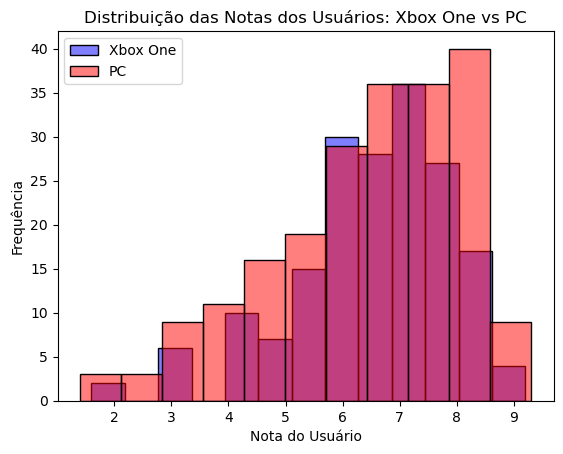

p-value: 0.6206366351489678
Não podemos rejeitar a hipótese nula


In [39]:

alpha = 0.05 #alpha definido por padrão do mercado

df_xone = df[df['platform'] == 'XOne']['user_score'].dropna() #limpando NA
df_pc = df[df['platform'] == 'PC']['user_score'].dropna()


sns.histplot(df_xone,color="blue", label="Xbox One", alpha=0.5)
sns.histplot(df_pc, color="red", label="PC", alpha=0.5)


plt.title('Distribuição das Notas dos Usuários: Xbox One vs PC')
plt.xlabel('Nota do Usuário')
plt.ylabel('Frequência')
plt.legend()
plt.show()


results = stats.ttest_ind(df_xone, df_pc, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")




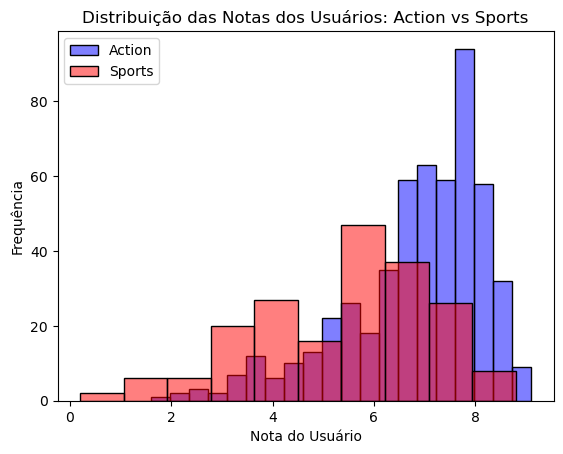

p-value: 2.337200239591976e-20
Rejeitamos a hipótese nula


In [41]:
df_action = df[df['genre'] == 'Action']['user_score'].dropna()
df_sports = df[df['genre'] == 'Sports']['user_score'].dropna()

sns.histplot(df_action,color="blue", label="Action", alpha=0.5)
sns.histplot(df_sports,color="red", label="Sports", alpha=0.5)

plt.title('Distribuição das Notas dos Usuários: Action vs Sports')
plt.xlabel('Nota do Usuário')
plt.ylabel('Frequência')
plt.legend()
plt.show()

results = stats.ttest_ind(df_action, df_sports, equal_var=False)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

